In [175]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.15.0
1.24.3


In [176]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [345]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/rock_scissor_paper1/scissor'
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

1004  images to be resized.


C:\Users\angel\AppData\Local\Temp\ipykernel_24056\498959286.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1004  images resized.
가위 이미지 resize 완료!


In [346]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/rock_scissor_paper1/rock'
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1016  images to be resized.


C:\Users\angel\AppData\Local\Temp\ipykernel_24056\498959286.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1016  images resized.


In [347]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/rock_scissor_paper1/paper'

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

974  images to be resized.


C:\Users\angel\AppData\Local\Temp\ipykernel_24056\498959286.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


974  images resized.


In [348]:
import numpy as np

def load_data(img_path, number_of_data=2994):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/rock_scissor_paper1'
(x_train, y_train)=load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 2994 입니다.
x_train shape: (2994, 28, 28, 3)
y_train shape: (2994,)


라벨:  0


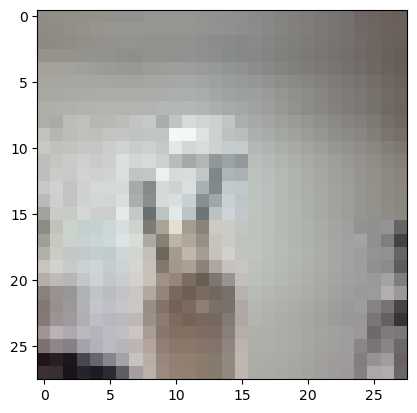

In [349]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [350]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=18

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_344 (Conv2D)         (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_341 (MaxPool  (None, 13, 13, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_345 (Conv2D)         (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_342 (MaxPool  (None, 5, 5, 32)          0         
 ing2D)                                                          
                                                                 
 flatten_169 (Flatten)       (None, 800)               0         
                                                                 
 dense_336 (Dense)           (None, 32)             

In [351]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

x_train_norm = x_train / 255.0

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/18
94/94 [==============================] - 1s 5ms/step - loss: 0.7520 - accuracy: 0.8403
Epoch 2/18
94/94 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9927
Epoch 3/18
94/94 [==============================] - 0s 5ms/step - loss: 0.0063 - accuracy: 0.9997
Epoch 4/18
94/94 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 5/18
94/94 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/18
94/94 [==============================] - 0s 5ms/step - loss: 7.6185e-04 - accuracy: 1.0000
Epoch 7/18
94/94 [==============================] - 0s 5ms/step - loss: 5.2234e-04 - accuracy: 1.0000
Epoch 8/18
94/94 [==============================] - 0s 5ms/step - loss: 3.4536e-04 - accuracy: 1.0000
Epoch 9/18
94/94 [==============================] - 0s 5ms/step - loss: 2.6081e-04 - accuracy: 1.0000
Epoch 10/18
94/94 [==============================] - 0s 5ms/step - loss: 1.9206e-04 - accuracy: 1.0000

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.


C:\Users\angel\AppData\Local\Temp\ipykernel_24056\2118193115.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.


데이터의 이미지 개수는 300 입니다.
x_test shape: (603, 28, 28, 3)
y_test shape: (603,) 

라벨:  0


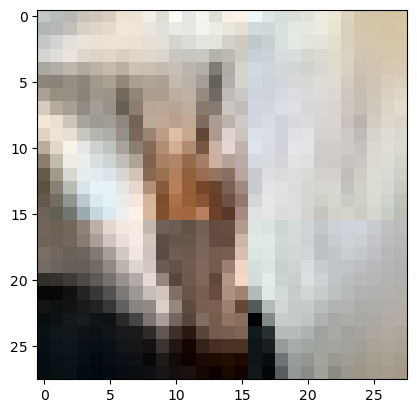

In [210]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.


# 28 X 28 사이즈로 변경하기
# 가위
image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/test/scissor'
resize_images(image_dir_path)

# 바위
image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/test/rock'
resize_images(image_dir_path)

# 보
image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/test/paper'
resize_images(image_dir_path)

print('\n')

# x_test, y_test 만들기
image_dir_path = 'C:/Users/angel/JoBoB/Work/AIFFEL/jupyter/DeepLearning from scratch/MainQuest/test'
(x_test, y_test)=load_data(image_dir_path)

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {} \n".format(y_train.shape))

plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [352]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

# 아무런 overfitting 관련 처리를 하지 않은 상태
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 7.0547 - accuracy: 0.1542 - 205ms/epoch - 11ms/step
test_loss: 7.054731845855713 
test_accuracy: 0.15422885119915009


In [353]:
# overfitting 방지해보기


# weight initalization 사용 ( ReLu를 활성화함수로 쓰고 있기에 그에 맞는 He 초기값 사용)
# strides를 maxpool에 맞게 적용
n_channel_1=8
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(3, activation='softmax'))

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/15
94/94 [==============================] - 1s 5ms/step - loss: 0.9007 - accuracy: 0.6339
Epoch 2/15
94/94 [==============================] - 0s 5ms/step - loss: 0.3640 - accuracy: 0.9075
Epoch 3/15
94/94 [==============================] - 0s 5ms/step - loss: 0.1609 - accuracy: 0.9649
Epoch 4/15
94/94 [==============================] - 0s 5ms/step - loss: 0.0978 - accuracy: 0.9820
Epoch 5/15
94/94 [==============================] - 0s 4ms/step - loss: 0.0775 - accuracy: 0.9856
Epoch 6/15
94/94 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9903
Epoch 7/15
94/94 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.9893
Epoch 8/15
94/94 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9913
Epoch 9/15
94/94 [==============================] - 1s 6ms/step - loss: 0.0185 - accuracy: 0.9983
Epoch 10/15
94/94 [==============================] - 1s 6ms/step - loss: 0.0140 - accuracy: 0.9993
Epoch 11/15
94/94 [

## 보고서
### 개요
mainquest 03 관련해서 끝나고 남기는 보고서

### summary
CNN을 활용해 가위바위보를 분류하고 그에 맞게 test 데이터에서의 성능을 끌어올리기 위해 노력한다.

성능을 끌어올리기 위해 overfitting 방지를 위해 정규화, pooling에서의 stride 추가, 가중치 감소를 위해 가중치 초기화 등 여러가지를 사용해서 구현

정규화 : x_test_norm , x_train_norm 을 통해 구현해서 0 ~ 255 사이에 값을 가지게 만듬

pooling strides : maxpooling 에서는 filter 크기만큼 strides 값을 주는 것이 일반적

weight inialization : Relu를 활성화 함수로 사용하게 되면 he 초기화값을 사용해 relu에 최적화된 가중치 값을 할당받을 수 있음

### 회고
이번주에 하게된 밑바닥 부터 시작하는 딥러닝 시간에는 개인적으로 공부할 시간이 너무 부족했다. 일단 너무나도 많은 일정이 겹쳐있어 이걸 다 소화하기도 힘들었고 중간에 장례식장도 갔다오게 되니 정신적으로 너무 힘들었다. 그러다 보니 공부할 시간이 부족했고, 많은 시간을 투자해서 꼼꼼히 공부하는 스타일이었지만, 이번에는 그러지 못해 기술적으로 너무 부족한게 느껴져 아쉬움이 크다. 이제라도 수업일정이 거의 다 마무리되었고 나머지 일정도 그렇게 힘든게 남아있지 않기 때문에 공부를 추가적으로 진행할 예정이다. 이번 밑시딥에서 같이 한 팀원들과 몇 명을 더 모아서 수업이 끝나고 남아서 하는 스터디 형태로 좀 더 공부할 예정이다.